In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import RMSprop
from scikeras.wrappers import KerasClassifier

### load the dataset

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
x_train=x_train.reshape(60000,784)#converting img to pixel values
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float')#because the pixel value is in decimal otherwise if 2.5 is converted to 2
x_test=x_test.astype('float')
x_train=x_train/255#standardizing
x_test/=255

In [5]:
x_train.shape

(60000, 784)

In [6]:
x_train.max()

1.0

In [7]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [8]:
pd.DataFrame(y_test)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
opchs=5
batch_size=150
no_classes=10 #no of classification in output

### Building the model

In [10]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))#512 is a no of neurons in 1st hidden layer
model.add(Dropout(0.2))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(no_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               153900    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 558830 (2.13 MB)
Trainable params: 558830 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
512*784+512#wx+B

401920

In [12]:
300*512+300

153900

In [13]:
10*300+10

3010

### compile model

In [14]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics='accuracy')#based on the accuracy we are optimizing

### Fit the model

In [15]:
history=model.fit(x_train,y_train,epochs=5,batch_size=150,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
400/400 [==============================] - 7s 16ms/step - loss: 0.2734 - accuracy: 0.9164 - val_loss: 0.1176 - val_accuracy: 0.9641
Epoch 2/5
400/400 [==============================] - 6s 15ms/step - loss: 0.1128 - accuracy: 0.9658 - val_loss: 0.0805 - val_accuracy: 0.9748
Epoch 3/5
400/400 [==============================] - 6s 15ms/step - loss: 0.0785 - accuracy: 0.9760 - val_loss: 0.0690 - val_accuracy: 0.9781
Epoch 4/5
400/400 [==============================] - 6s 15ms/step - loss: 0.0618 - accuracy: 0.9810 - val_loss: 0.0765 - val_accuracy: 0.9778
Epoch 5/5
400/400 [==============================] - 7s 17ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.0692 - val_accuracy: 0.9799


In [16]:
# loss,accuracy=training data     |     val_loss,val_accuracy=testing data

In [17]:
score=model.evaluate(x_test,y_test)
print(' ')
print("OUTPUT")
print('The val_loss=',score[0])
print('THe val_accuracy=',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0692 - accuracy: 0.9799
 
OUTPUT
The val_loss= 0.06920210272073746
THe val_accuracy= 0.9799000024795532


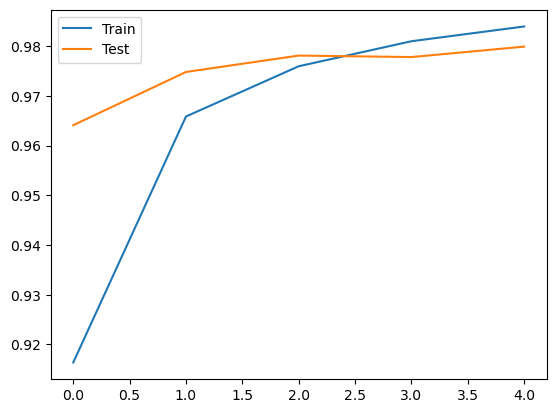

In [18]:
plt.plot(range(5),history.history['accuracy'],label='Train')
plt.plot(range(5),history.history['val_accuracy'],label='Test')
plt.legend()

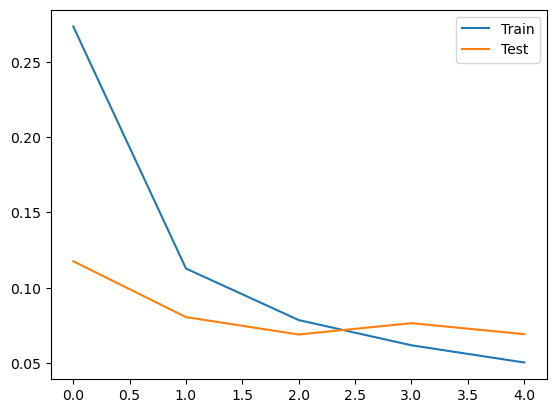

In [19]:
plt.plot(range(5),history.history['loss'],label='Train')
plt.plot(range(5),history.history['val_loss'],label='Test')
plt.legend()

In [20]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [21]:
y_pred

array([[2.83793211e-10, 4.39999859e-09, 1.08456543e-05, ...,
        9.99982238e-01, 1.47089580e-07, 5.55502879e-08],
       [2.18773337e-07, 2.71038967e-04, 9.99672294e-01, ...,
        5.14061238e-09, 4.73409500e-06, 2.77732903e-09],
       [2.28985655e-07, 9.99560058e-01, 1.35440705e-05, ...,
        1.27716732e-04, 1.88678227e-04, 1.11441034e-06],
       ...,
       [1.19956332e-14, 8.02911296e-12, 1.08180338e-13, ...,
        2.34267783e-09, 1.65053526e-09, 1.38619299e-07],
       [7.05967368e-11, 3.80628363e-13, 1.63890762e-14, ...,
        1.96141801e-11, 4.82557823e-07, 3.59166212e-12],
       [9.95290655e-12, 4.58697642e-13, 5.75422939e-15, ...,
        1.77164055e-17, 4.98114841e-13, 3.89357904e-12]], dtype=float32)

In [22]:
pd.DataFrame(y_pred)

,0,1,2,3,4,5,6,7,8,9
0,2.837932e-10,4.399999e-09,1.084565e-05,6.635306e-06,2.356166e-12,3.397598e-09,9.049834e-12,9.999822e-01,1.470896e-07,5.555029e-08
1,2.187733e-07,2.710390e-04,9.996723e-01,3.837227e-05,6.031710e-10,2.092606e-06,1.122382e-05,5.140612e-09,4.734095e-06,2.777329e-09
2,2.289857e-07,9.995601e-01,1.354407e-05,9.509266e-07,6.214049e-05,4.572460e-06,4.096189e-05,1.277167e-04,1.886782e-04,1.114410e-06
3,9.999238e-01,1.255759e-09,1.652155e-07,3.832054e-08,2.393016e-08,3.894600e-07,6.307920e-05,3.750719e-07,3.493618e-09,1.201029e-05
4,8.003927e-09,1.755703e-08,1.272432e-08,1.108939e-10,9.999655e-01,2.689348e-09,2.288206e-08,3.678067e-07,1.311700e-08,3.410683e-05
...,...,...,...,...,...,...,...,...,...,...
9995,1.945451e-12,3.462064e-07,9.999995e-01,9.568687e-09,3.021605e-16,5.932002e-13,3.808499e-13,6.824676e-08,4.947342e-10,1.148019e-12
9996,1.046800e-13,6.612317e-10,7.838286e-10,9.999832e-01,1.104086e-13,5.301486e-06,3.971260e-16,9.648292e-12,1.416850e-09,1.151547e-05
9997,1.199563e-14,8.029113e-12,1.081803e-13,2.586049e-13,9.999999e-01,1.002012e-11,1.015600e-12,2.342678e-09,1.650535e-09,1.386193e-07
9998,7.059674e-11,3.806284e-13,1.638908e-14,5.715719e-09,1.523370e-14,9.999995e-01,6.248866e-09,1.961418e-11,4.825578e-07,3.591662e-12


In [23]:
y_pred[0]

array([2.8379321e-10, 4.3999986e-09, 1.0845654e-05, 6.6353059e-06,
       2.3561658e-12, 3.3975982e-09, 9.0498338e-12, 9.9998224e-01,
       1.4708958e-07, 5.5550288e-08], dtype=float32)

In [24]:
np.argmax(y_pred[0])

7

In [25]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
a=[]
for i in range(len(y_pred)):
    a.append(np.argmax(y_pred[i]))

In [27]:
a

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 9,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [30]:
b=[]
for i in range(len(y_test)):
    b.append(np.argmax(y_test[i]))

In [31]:
b

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [35]:
df=pd.DataFrame(a,columns=['predicted values'])
df

,predicted values
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [36]:
df['actual values']=b
df

,predicted values,actual values
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [37]:
from sklearn.metrics import accuracy_score,classification_report

In [44]:
accuracy_score(df['predicted values'],df['actual values'])

0.9799

In [45]:
print(classification_report(df['predicted values'],df['actual values']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       973
           1       0.99      0.99      0.99      1133
           2       0.97      0.99      0.98      1016
           3       0.98      0.99      0.98       994
           4       0.98      0.98      0.98       983
           5       0.99      0.97      0.98       919
           6       0.98      0.97      0.98       968
           7       0.97      0.99      0.98      1010
           8       0.98      0.96      0.97       992
           9       0.98      0.97      0.97      1012

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Hyper parameters Tuning

In [46]:
params={'epochs':[5,10,15,20],'batch_size':[100,150,200,250]}

In [47]:
kerasc=KerasClassifier(model)

In [48]:
grid_search=GridSearchCV(kerasc,params)

In [49]:
grid_search.fit(x_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp8ud95yuv\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp8ud95yuv\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmph4thgps1\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmph4thgps1\assets


Epoch 1/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0468 - accuracy: 0.9843
Epoch 2/5
480/480 [==============================] - 6s 13ms/step - loss: 0.0405 - accuracy: 0.9877
Epoch 3/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0354 - accuracy: 0.9888
Epoch 4/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0289 - accuracy: 0.9906
Epoch 5/5
120/120 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpwlmpd5sk\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpwlmpd5sk\assets


Epoch 1/5
480/480 [==============================] - 7s 13ms/step - loss: 0.0475 - accuracy: 0.9851
Epoch 2/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 3/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0358 - accuracy: 0.9889
Epoch 4/5
480/480 [==============================] - 6s 13ms/step - loss: 0.0311 - accuracy: 0.9898
Epoch 5/5
120/120 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpgxbdbnkq\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpgxbdbnkq\assets


Epoch 1/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0451 - accuracy: 0.9855
Epoch 2/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0397 - accuracy: 0.9869
Epoch 3/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 4/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 5/5
120/120 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp7domqr99\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp7domqr99\assets


Epoch 1/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0471 - accuracy: 0.9851
Epoch 2/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0383 - accuracy: 0.9877
Epoch 3/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 4/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0291 - accuracy: 0.9907
Epoch 5/5
120/120 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpvozwhaji\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpvozwhaji\assets


Epoch 1/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0474 - accuracy: 0.9845
Epoch 2/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0401 - accuracy: 0.9870
Epoch 3/5
480/480 [==============================] - 6s 13ms/step - loss: 0.0344 - accuracy: 0.9886
Epoch 4/5
480/480 [==============================] - 6s 13ms/step - loss: 0.0298 - accuracy: 0.9902
Epoch 5/5
120/120 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp02pcuxqj\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp02pcuxqj\assets


Epoch 1/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0461 - accuracy: 0.9853
Epoch 2/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0406 - accuracy: 0.9872
Epoch 3/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0343 - accuracy: 0.9887
Epoch 4/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 5/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0239 - accuracy: 0.9922
Epoch 6/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0236 - accuracy: 0.9925
Epoch 7/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0201 - accuracy: 0.9931
Epoch 8/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 9/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 10/10
120/120 [==============================] - 1s 5ms/step
INFO:tensorflow:Assets w

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmphrozqp2u\assets


Epoch 1/10
480/480 [==============================] - 7s 14ms/step - loss: 0.0475 - accuracy: 0.9854
Epoch 2/10
480/480 [==============================] - 6s 14ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 3/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0361 - accuracy: 0.9882
Epoch 4/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0316 - accuracy: 0.9901
Epoch 5/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0292 - accuracy: 0.9913
Epoch 6/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 7/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 8/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0183 - accuracy: 0.9945
Epoch 9/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 10/10
120/120 [==============================] - 1s 5ms/step
INFO:tensorflow:Assets w

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmprqm96vgh\assets


Epoch 1/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0476 - accuracy: 0.9852
Epoch 2/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0407 - accuracy: 0.9876
Epoch 3/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0355 - accuracy: 0.9885
Epoch 4/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 5/10
480/480 [==============================] - 7s 14ms/step - loss: 0.0288 - accuracy: 0.9904
Epoch 6/10
480/480 [==============================] - 7s 14ms/step - loss: 0.0225 - accuracy: 0.9923
Epoch 7/10
480/480 [==============================] - 9s 18ms/step - loss: 0.0196 - accuracy: 0.9940
Epoch 8/10
480/480 [==============================] - 7s 14ms/step - loss: 0.0183 - accuracy: 0.9937
Epoch 9/10
480/480 [==============================] - 8s 17ms/step - loss: 0.0168 - accuracy: 0.9949
Epoch 10/10
120/120 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets w

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp96hyont2\assets


Epoch 1/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0447 - accuracy: 0.9859
Epoch 2/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0372 - accuracy: 0.9886
Epoch 3/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0335 - accuracy: 0.9892
Epoch 4/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0326 - accuracy: 0.9895
Epoch 5/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0249 - accuracy: 0.9917
Epoch 6/10
480/480 [==============================] - 7s 14ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 7/10
480/480 [==============================] - 7s 14ms/step - loss: 0.0191 - accuracy: 0.9939
Epoch 8/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0177 - accuracy: 0.9937
Epoch 9/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 10/10
120/120 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets w

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpaam8j8_t\assets


Epoch 1/10
480/480 [==============================] - 6s 11ms/step - loss: 0.0467 - accuracy: 0.9853
Epoch 2/10
480/480 [==============================] - 5s 11ms/step - loss: 0.0401 - accuracy: 0.9868
Epoch 3/10
480/480 [==============================] - 5s 11ms/step - loss: 0.0309 - accuracy: 0.9901
Epoch 4/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0307 - accuracy: 0.9902
Epoch 5/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0265 - accuracy: 0.9910
Epoch 6/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 7/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 8/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 9/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0178 - accuracy: 0.9945
Epoch 10/10
120/120 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets w

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpl81q5yum\assets


Epoch 1/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0455 - accuracy: 0.9856
Epoch 2/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0392 - accuracy: 0.9873
Epoch 3/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 4/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0305 - accuracy: 0.9902
Epoch 5/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0263 - accuracy: 0.9918
Epoch 6/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 7/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 8/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 9/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 10/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0155 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpjuozbgib\assets


Epoch 1/15
480/480 [==============================] - 6s 13ms/step - loss: 0.0490 - accuracy: 0.9841
Epoch 2/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0410 - accuracy: 0.9869
Epoch 3/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0364 - accuracy: 0.9890
Epoch 4/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0320 - accuracy: 0.9896
Epoch 5/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0284 - accuracy: 0.9907
Epoch 6/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0249 - accuracy: 0.9918
Epoch 7/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0208 - accuracy: 0.9936
Epoch 8/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 9/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 10/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0185 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpj5kp3m2g\assets


Epoch 1/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0468 - accuracy: 0.9855
Epoch 2/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0395 - accuracy: 0.9874
Epoch 3/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0344 - accuracy: 0.9892
Epoch 4/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0320 - accuracy: 0.9895
Epoch 5/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0267 - accuracy: 0.9910
Epoch 6/15
480/480 [==============================] - 6s 13ms/step - loss: 0.0226 - accuracy: 0.9923
Epoch 7/15
480/480 [==============================] - 7s 14ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 8/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 9/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 10/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0157 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp67icqmol\assets


Epoch 1/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0447 - accuracy: 0.9858
Epoch 2/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0385 - accuracy: 0.9877
Epoch 3/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 4/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0300 - accuracy: 0.9903
Epoch 5/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0252 - accuracy: 0.9911
Epoch 6/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 7/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0207 - accuracy: 0.9932
Epoch 8/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 9/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 10/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0156 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpe4ylckyt\assets


Epoch 1/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0474 - accuracy: 0.9851
Epoch 2/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0411 - accuracy: 0.9870
Epoch 3/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0346 - accuracy: 0.9888
Epoch 4/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0294 - accuracy: 0.9909
Epoch 5/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0261 - accuracy: 0.9911
Epoch 6/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 7/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0229 - accuracy: 0.9923
Epoch 8/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 9/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0166 - accuracy: 0.9948
Epoch 10/15
480/480 [==============================] - 6s 12ms/step - loss: 0.0155 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpm5fu848y\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpm5fu848y\assets


Epoch 1/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0471 - accuracy: 0.9852
Epoch 2/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0391 - accuracy: 0.9874
Epoch 3/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0339 - accuracy: 0.9889
Epoch 4/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0287 - accuracy: 0.9904
Epoch 5/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0260 - accuracy: 0.9912
Epoch 6/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 7/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0235 - accuracy: 0.9933
Epoch 8/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 9/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 10/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0158 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpiihdmfg5\assets


Epoch 1/20
480/480 [==============================] - 7s 13ms/step - loss: 0.0481 - accuracy: 0.9848
Epoch 2/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0423 - accuracy: 0.9870
Epoch 3/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0357 - accuracy: 0.9889
Epoch 4/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0305 - accuracy: 0.9903
Epoch 5/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 6/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 7/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 8/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0211 - accuracy: 0.9934
Epoch 9/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 10/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0174 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpylu449d1\assets


Epoch 1/20
480/480 [==============================] - 7s 13ms/step - loss: 0.0474 - accuracy: 0.9846
Epoch 2/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0403 - accuracy: 0.9866
Epoch 3/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0329 - accuracy: 0.9899
Epoch 4/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 5/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 6/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 7/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0214 - accuracy: 0.9931
Epoch 8/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0202 - accuracy: 0.9935
Epoch 9/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0170 - accuracy: 0.9943
Epoch 10/20
480/480 [==============================] - 6s 13ms/step - loss: 0.0174 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpxprz29v4\assets


Epoch 1/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0459 - accuracy: 0.9854
Epoch 2/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0383 - accuracy: 0.9877
Epoch 3/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0314 - accuracy: 0.9893
Epoch 4/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 5/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0241 - accuracy: 0.9924
Epoch 6/20
480/480 [==============================] - 7s 14ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 7/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0196 - accuracy: 0.9932
Epoch 8/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 9/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 10/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0159 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp86r38o2h\assets


Epoch 1/20
480/480 [==============================] - 8s 15ms/step - loss: 0.0478 - accuracy: 0.9846
Epoch 2/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0406 - accuracy: 0.9879
Epoch 3/20
480/480 [==============================] - 8s 16ms/step - loss: 0.0346 - accuracy: 0.9886
Epoch 4/20
480/480 [==============================] - 8s 16ms/step - loss: 0.0302 - accuracy: 0.9901
Epoch 5/20
480/480 [==============================] - 8s 16ms/step - loss: 0.0269 - accuracy: 0.9910
Epoch 6/20
480/480 [==============================] - 9s 20ms/step - loss: 0.0258 - accuracy: 0.9921
Epoch 7/20
480/480 [==============================] - 9s 18ms/step - loss: 0.0213 - accuracy: 0.9928
Epoch 8/20
480/480 [==============================] - 10s 20ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 9/20
480/480 [==============================] - 8s 18ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 10/20
480/480 [==============================] - 8s 16ms/step - loss: 0.0187 - accur

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp2mwu6xfx\assets


Epoch 1/5
320/320 [==============================] - 6s 16ms/step - loss: 0.0415 - accuracy: 0.9866
Epoch 2/5
320/320 [==============================] - 6s 17ms/step - loss: 0.0347 - accuracy: 0.9889
Epoch 3/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 4/5
320/320 [==============================] - 6s 18ms/step - loss: 0.0243 - accuracy: 0.9924
Epoch 5/5
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpfkllshal\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpfkllshal\assets


Epoch 1/5
320/320 [==============================] - 6s 17ms/step - loss: 0.0438 - accuracy: 0.9860
Epoch 2/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0356 - accuracy: 0.9891
Epoch 3/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0311 - accuracy: 0.9898
Epoch 4/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 5/5
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpfsgci42u\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpfsgci42u\assets


Epoch 1/5
320/320 [==============================] - 6s 17ms/step - loss: 0.0422 - accuracy: 0.9862
Epoch 2/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0344 - accuracy: 0.9889
Epoch 3/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 4/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0250 - accuracy: 0.9919
Epoch 5/5
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpy50exoru\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpy50exoru\assets


Epoch 1/5
320/320 [==============================] - 6s 17ms/step - loss: 0.0397 - accuracy: 0.9869
Epoch 2/5
320/320 [==============================] - 6s 17ms/step - loss: 0.0326 - accuracy: 0.9895
Epoch 3/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0278 - accuracy: 0.9909
Epoch 4/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0248 - accuracy: 0.9919
Epoch 5/5
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpcps07t8i\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpcps07t8i\assets


Epoch 1/5
320/320 [==============================] - 6s 17ms/step - loss: 0.0414 - accuracy: 0.9864
Epoch 2/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0357 - accuracy: 0.9881
Epoch 3/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0275 - accuracy: 0.9908
Epoch 4/5
320/320 [==============================] - 5s 17ms/step - loss: 0.0259 - accuracy: 0.9911
Epoch 5/5
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpr9dxqcl1\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpr9dxqcl1\assets


Epoch 1/10


320/320 [==============================] - 7s 17ms/step - loss: 0.0424 - accuracy: 0.9865
Epoch 2/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 3/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 4/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0259 - accuracy: 0.9914
Epoch 5/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 6/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 7/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0165 - accuracy: 0.9941
Epoch 8/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 9/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0159 - accuracy: 0.9946
Epoch 10/10
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets written to: C:

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpjesks3yc\assets


Epoch 1/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 2/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0343 - accuracy: 0.9888
Epoch 3/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0297 - accuracy: 0.9900
Epoch 4/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0272 - accuracy: 0.9913
Epoch 5/10
320/320 [==============================] - 6s 18ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 6/10
320/320 [==============================] - 6s 18ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 7/10
320/320 [==============================] - 6s 18ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 8/10
320/320 [==============================] - 6s 18ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 9/10
320/320 [==============================] - 6s 18ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 10/10
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpieww1v50\assets


Epoch 1/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0418 - accuracy: 0.9866
Epoch 2/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 3/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0292 - accuracy: 0.9902
Epoch 4/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 5/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0221 - accuracy: 0.9925
Epoch 6/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 7/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 8/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 9/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 10/10
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpaga7wvbm\assets


Epoch 1/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0409 - accuracy: 0.9869
Epoch 2/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0312 - accuracy: 0.9898
Epoch 3/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0294 - accuracy: 0.9907
Epoch 4/10
320/320 [==============================] - 5s 17ms/step - loss: 0.0236 - accuracy: 0.9917
Epoch 5/10
320/320 [==============================] - 6s 17ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 6/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 7/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0172 - accuracy: 0.9943
Epoch 8/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0168 - accuracy: 0.9944
Epoch 9/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0136 - accuracy: 0.9954
Epoch 10/10
80/80 [==============================] - 1s 5ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpy9ax6orc\assets


Epoch 1/10
320/320 [==============================] - 6s 16ms/step - loss: 0.0419 - accuracy: 0.9864
Epoch 2/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0340 - accuracy: 0.9892
Epoch 3/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0311 - accuracy: 0.9902
Epoch 4/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 5/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 6/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 7/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 8/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0152 - accuracy: 0.9949
Epoch 9/10
320/320 [==============================] - 5s 16ms/step - loss: 0.0149 - accuracy: 0.9949
Epoch 10/10
80/80 [==============================] - 1s 6ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpixsmd0cx\assets


Epoch 1/15
320/320 [==============================] - 6s 16ms/step - loss: 0.0413 - accuracy: 0.9868
Epoch 2/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0333 - accuracy: 0.9892
Epoch 3/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0287 - accuracy: 0.9905
Epoch 4/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0249 - accuracy: 0.9916
Epoch 5/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 6/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 7/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0177 - accuracy: 0.9937
Epoch 8/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 9/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0149 - accuracy: 0.9954
Epoch 10/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0135 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpi1egggn3\assets


Epoch 1/15
320/320 [==============================] - 6s 16ms/step - loss: 0.0438 - accuracy: 0.9859
Epoch 2/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0355 - accuracy: 0.9886
Epoch 3/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0289 - accuracy: 0.9902
Epoch 4/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0285 - accuracy: 0.9906
Epoch 5/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 6/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 7/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0199 - accuracy: 0.9936
Epoch 8/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0177 - accuracy: 0.9939
Epoch 9/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0157 - accuracy: 0.9950
Epoch 10/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0150 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp9_9d_05i\assets


Epoch 1/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0409 - accuracy: 0.9866
Epoch 2/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0346 - accuracy: 0.9889
Epoch 3/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0282 - accuracy: 0.9906
Epoch 4/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0252 - accuracy: 0.9922
Epoch 5/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0227 - accuracy: 0.9924
Epoch 6/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 7/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 8/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0165 - accuracy: 0.9944
Epoch 9/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0149 - accuracy: 0.9951
Epoch 10/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0129 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpcleqsmga\assets


Epoch 1/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0408 - accuracy: 0.9866
Epoch 2/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0334 - accuracy: 0.9891
Epoch 3/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0279 - accuracy: 0.9915
Epoch 4/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0247 - accuracy: 0.9924
Epoch 5/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0210 - accuracy: 0.9927
Epoch 6/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 7/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 8/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0157 - accuracy: 0.9947
Epoch 9/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0145 - accuracy: 0.9949
Epoch 10/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0126 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp1o8at8iu\assets


Epoch 1/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0412 - accuracy: 0.9863
Epoch 2/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0347 - accuracy: 0.9884
Epoch 3/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0303 - accuracy: 0.9899
Epoch 4/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0260 - accuracy: 0.9913
Epoch 5/15
320/320 [==============================] - 5s 16ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 6/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 7/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0176 - accuracy: 0.9942
Epoch 8/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0170 - accuracy: 0.9941
Epoch 9/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0157 - accuracy: 0.9947
Epoch 10/15
320/320 [==============================] - 5s 15ms/step - loss: 0.0115 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmprhrpmrs_\assets


Epoch 1/20
320/320 [==============================] - 6s 15ms/step - loss: 0.0410 - accuracy: 0.9872
Epoch 2/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0352 - accuracy: 0.9889
Epoch 3/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0298 - accuracy: 0.9900
Epoch 4/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0254 - accuracy: 0.9913
Epoch 5/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0218 - accuracy: 0.9925
Epoch 6/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 7/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 8/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 9/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0148 - accuracy: 0.9949
Epoch 10/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0148 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmps8vy_ceq\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmps8vy_ceq\assets


Epoch 1/20
320/320 [==============================] - 6s 16ms/step - loss: 0.0420 - accuracy: 0.9868
Epoch 2/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0358 - accuracy: 0.9884
Epoch 3/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0304 - accuracy: 0.9899
Epoch 4/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0276 - accuracy: 0.9914
Epoch 5/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 6/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0199 - accuracy: 0.9934
Epoch 7/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0188 - accuracy: 0.9938
Epoch 8/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0173 - accuracy: 0.9942
Epoch 9/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0152 - accuracy: 0.9950
Epoch 10/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0144 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpy_wcme2z\assets


Epoch 1/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0414 - accuracy: 0.9862
Epoch 2/20
320/320 [==============================] - 5s 15ms/step - loss: 0.0352 - accuracy: 0.9887
Epoch 3/20
320/320 [==============================] - 7s 22ms/step - loss: 0.0309 - accuracy: 0.9897
Epoch 4/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 5/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 6/20
320/320 [==============================] - 8s 24ms/step - loss: 0.0203 - accuracy: 0.9931
Epoch 7/20
320/320 [==============================] - 8s 24ms/step - loss: 0.0182 - accuracy: 0.9945
Epoch 8/20
320/320 [==============================] - 8s 25ms/step - loss: 0.0175 - accuracy: 0.9940
Epoch 9/20
320/320 [==============================] - 8s 26ms/step - loss: 0.0146 - accuracy: 0.9952
Epoch 10/20
320/320 [==============================] - 8s 24ms/step - loss: 0.0138 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp1k5p_qnw\assets


Epoch 1/20
320/320 [==============================] - 9s 23ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 2/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 3/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 4/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 5/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 15/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 16/20
320/320 [==============================] - 7s 22ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 17/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0095 - accuracy: 0.9969
Epoch 18/20
320/320 [==============================] - 7s 23ms/step - loss: 0.0080 - accuracy: 0.9975
Epoch 19/20
320/320 [==============================] - 6s 20ms/step - loss: 0.0073 - ac

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp_1hwwxx7\assets


Epoch 1/5
240/240 [==============================] - 8s 27ms/step - loss: 0.0374 - accuracy: 0.9881
Epoch 2/5
240/240 [==============================] - 7s 27ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 3/5
240/240 [==============================] - 6s 27ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 4/5
240/240 [==============================] - 6s 27ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 5/5
60/60 [==============================] - 1s 9ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpye3tres9\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpye3tres9\assets


Epoch 1/5
240/240 [==============================] - 8s 26ms/step - loss: 0.0402 - accuracy: 0.9870
Epoch 2/5
240/240 [==============================] - 7s 27ms/step - loss: 0.0324 - accuracy: 0.9894
Epoch 3/5
240/240 [==============================] - 6s 27ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 4/5
240/240 [==============================] - 6s 27ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 5/5
60/60 [==============================] - 1s 10ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp4ya4pltc\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp4ya4pltc\assets


Epoch 1/5
240/240 [==============================] - 6s 21ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 2/5
240/240 [==============================] - 6s 23ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 3/5
240/240 [==============================] - 6s 27ms/step - loss: 0.0276 - accuracy: 0.9914
Epoch 4/5
240/240 [==============================] - 6s 25ms/step - loss: 0.0244 - accuracy: 0.9920
Epoch 5/5
60/60 [==============================] - 1s 10ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpth_a260n\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpth_a260n\assets


Epoch 1/5
240/240 [==============================] - 8s 27ms/step - loss: 0.0368 - accuracy: 0.9875
Epoch 2/5
240/240 [==============================] - 6s 26ms/step - loss: 0.0310 - accuracy: 0.9896
Epoch 3/5
240/240 [==============================] - 6s 27ms/step - loss: 0.0270 - accuracy: 0.9910
Epoch 4/5
240/240 [==============================] - 6s 26ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 5/5
60/60 [==============================] - 1s 10ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp8ctxwys0\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp8ctxwys0\assets


Epoch 1/5
240/240 [==============================] - 8s 28ms/step - loss: 0.0398 - accuracy: 0.9875
Epoch 2/5
240/240 [==============================] - 6s 27ms/step - loss: 0.0308 - accuracy: 0.9902
Epoch 3/5
240/240 [==============================] - 7s 27ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 4/5
240/240 [==============================] - 7s 28ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 5/5
60/60 [==============================] - 1s 9ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmppank9oj0\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmppank9oj0\assets


Epoch 1/10
240/240 [==============================] - 8s 27ms/step - loss: 0.0384 - accuracy: 0.9873
Epoch 2/10
240/240 [==============================] - 7s 27ms/step - loss: 0.0311 - accuracy: 0.9892
Epoch 3/10
240/240 [==============================] - 6s 27ms/step - loss: 0.0262 - accuracy: 0.9911
Epoch 4/10
240/240 [==============================] - 7s 28ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 5/10
240/240 [==============================] - 6s 27ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 6/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 7/10
240/240 [==============================] - 6s 27ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 8/10
240/240 [==============================] - 7s 27ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 9/10
240/240 [==============================] - 7s 27ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 10/10
60/60 [==============================] - 1s 10ms/step
INFO:tensorflow:Assets wr

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpu31gdx87\assets


Epoch 1/10
240/240 [==============================] - 8s 26ms/step - loss: 0.0402 - accuracy: 0.9872
Epoch 2/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0329 - accuracy: 0.9893
Epoch 3/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0278 - accuracy: 0.9914
Epoch 4/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0243 - accuracy: 0.9925
Epoch 5/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0216 - accuracy: 0.9927
Epoch 6/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 7/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 8/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0157 - accuracy: 0.9949
Epoch 9/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0137 - accuracy: 0.9953
Epoch 10/10
60/60 [==============================] - 1s 9ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpoc116_dt\assets


Epoch 1/10
240/240 [==============================] - 6s 23ms/step - loss: 0.0386 - accuracy: 0.9876
Epoch 2/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0324 - accuracy: 0.9898
Epoch 3/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 4/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0214 - accuracy: 0.9932
Epoch 5/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0195 - accuracy: 0.9939
Epoch 6/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 7/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0157 - accuracy: 0.9947
Epoch 8/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0139 - accuracy: 0.9952
Epoch 9/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0127 - accuracy: 0.9957
Epoch 10/10
60/60 [==============================] - 1s 9ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpig4cw8oz\assets


Epoch 1/10
240/240 [==============================] - 6s 19ms/step - loss: 0.0368 - accuracy: 0.9881
Epoch 2/10
240/240 [==============================] - 4s 17ms/step - loss: 0.0303 - accuracy: 0.9902
Epoch 3/10
240/240 [==============================] - 4s 18ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 4/10
240/240 [==============================] - 4s 18ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 5/10
240/240 [==============================] - 4s 18ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 6/10
240/240 [==============================] - 4s 18ms/step - loss: 0.0171 - accuracy: 0.9939
Epoch 7/10
240/240 [==============================] - 4s 18ms/step - loss: 0.0164 - accuracy: 0.9943
Epoch 8/10
240/240 [==============================] - 4s 19ms/step - loss: 0.0127 - accuracy: 0.9957
Epoch 9/10
240/240 [==============================] - 5s 19ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 10/10
60/60 [==============================] - 0s 6ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp16ylaz49\assets


Epoch 1/10
240/240 [==============================] - 5s 19ms/step - loss: 0.0371 - accuracy: 0.9885
Epoch 2/10
240/240 [==============================] - 5s 19ms/step - loss: 0.0317 - accuracy: 0.9895
Epoch 3/10
240/240 [==============================] - 5s 20ms/step - loss: 0.0280 - accuracy: 0.9906
Epoch 4/10
240/240 [==============================] - 4s 19ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 5/10
240/240 [==============================] - 4s 19ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 6/10
240/240 [==============================] - 4s 19ms/step - loss: 0.0187 - accuracy: 0.9935
Epoch 7/10
240/240 [==============================] - 4s 19ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 8/10
240/240 [==============================] - 5s 19ms/step - loss: 0.0161 - accuracy: 0.9945
Epoch 9/10
240/240 [==============================] - 5s 20ms/step - loss: 0.0126 - accuracy: 0.9957
Epoch 10/10
60/60 [==============================] - 0s 6ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmph0at74ty\assets


Epoch 1/15
240/240 [==============================] - 5s 19ms/step - loss: 0.0377 - accuracy: 0.9876
Epoch 2/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0310 - accuracy: 0.9895
Epoch 3/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0262 - accuracy: 0.9915
Epoch 4/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0231 - accuracy: 0.9926
Epoch 5/15
240/240 [==============================] - 4s 17ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 6/15
240/240 [==============================] - 4s 17ms/step - loss: 0.0185 - accuracy: 0.9939
Epoch 7/15
240/240 [==============================] - 4s 17ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 8/15
240/240 [==============================] - 4s 17ms/step - loss: 0.0155 - accuracy: 0.9947
Epoch 9/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0132 - accuracy: 0.9954
Epoch 10/15
240/240 [==============================] - 4s 17ms/step - loss: 0.0121 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpl28msayr\assets


Epoch 1/15
240/240 [==============================] - 5s 19ms/step - loss: 0.0383 - accuracy: 0.9881
Epoch 2/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 3/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 4/15
240/240 [==============================] - 5s 19ms/step - loss: 0.0234 - accuracy: 0.9921
Epoch 5/15
240/240 [==============================] - 5s 19ms/step - loss: 0.0223 - accuracy: 0.9925
Epoch 6/15
240/240 [==============================] - 5s 19ms/step - loss: 0.0198 - accuracy: 0.9930
Epoch 7/15
240/240 [==============================] - 5s 19ms/step - loss: 0.0163 - accuracy: 0.9945
Epoch 8/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 9/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0132 - accuracy: 0.9958
Epoch 10/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0123 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpolyus9km\assets


Epoch 1/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0388 - accuracy: 0.9876
Epoch 2/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 3/15
240/240 [==============================] - 4s 17ms/step - loss: 0.0261 - accuracy: 0.9912
Epoch 4/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0243 - accuracy: 0.9920
Epoch 5/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0205 - accuracy: 0.9927
Epoch 6/15
240/240 [==============================] - 5s 19ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 7/15
240/240 [==============================] - 4s 19ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 8/15
240/240 [==============================] - 4s 19ms/step - loss: 0.0140 - accuracy: 0.9949
Epoch 9/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 10/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0138 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp0d_emt_z\assets


Epoch 1/15
240/240 [==============================] - 6s 23ms/step - loss: 0.0385 - accuracy: 0.9873
Epoch 2/15
240/240 [==============================] - 5s 21ms/step - loss: 0.0321 - accuracy: 0.9895
Epoch 3/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0251 - accuracy: 0.9918
Epoch 4/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0209 - accuracy: 0.9928
Epoch 5/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0177 - accuracy: 0.9939
Epoch 6/15
240/240 [==============================] - 5s 21ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 7/15
240/240 [==============================] - 5s 21ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 8/15
240/240 [==============================] - 5s 21ms/step - loss: 0.0146 - accuracy: 0.9950
Epoch 9/15
240/240 [==============================] - 4s 19ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 10/15
240/240 [==============================] - 5s 19ms/step - loss: 0.0121 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpldn10nvj\assets


Epoch 1/15
240/240 [==============================] - 6s 20ms/step - loss: 0.0387 - accuracy: 0.9873
Epoch 2/15
240/240 [==============================] - 5s 21ms/step - loss: 0.0309 - accuracy: 0.9900
Epoch 3/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0268 - accuracy: 0.9913
Epoch 4/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 5/15
240/240 [==============================] - 4s 19ms/step - loss: 0.0186 - accuracy: 0.9934
Epoch 6/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 7/15
240/240 [==============================] - 4s 19ms/step - loss: 0.0149 - accuracy: 0.9949
Epoch 8/15
240/240 [==============================] - 5s 20ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 9/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0130 - accuracy: 0.9956
Epoch 10/15
240/240 [==============================] - 4s 18ms/step - loss: 0.0125 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpdrst9g9g\assets


Epoch 1/20
240/240 [==============================] - 5s 19ms/step - loss: 0.0371 - accuracy: 0.9878
Epoch 2/20
240/240 [==============================] - 4s 19ms/step - loss: 0.0322 - accuracy: 0.9891
Epoch 3/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 4/20
240/240 [==============================] - 5s 19ms/step - loss: 0.0225 - accuracy: 0.9922
Epoch 5/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 6/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0171 - accuracy: 0.9941
Epoch 7/20
240/240 [==============================] - 4s 19ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 8/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0156 - accuracy: 0.9945
Epoch 9/20
240/240 [==============================] - 5s 19ms/step - loss: 0.0126 - accuracy: 0.9958
Epoch 10/20
240/240 [==============================] - 5s 20ms/step - loss: 0.0122 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpd0s6bks8\assets


Epoch 1/20
240/240 [==============================] - 5s 18ms/step - loss: 0.0385 - accuracy: 0.9873
Epoch 2/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0346 - accuracy: 0.9894
Epoch 3/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0266 - accuracy: 0.9914
Epoch 4/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 5/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0219 - accuracy: 0.9927
Epoch 6/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 7/20
240/240 [==============================] - 5s 19ms/step - loss: 0.0163 - accuracy: 0.9945
Epoch 8/20
240/240 [==============================] - 4s 19ms/step - loss: 0.0160 - accuracy: 0.9948
Epoch 9/20
240/240 [==============================] - 5s 20ms/step - loss: 0.0132 - accuracy: 0.9953
Epoch 10/20
240/240 [==============================] - 5s 20ms/step - loss: 0.0121 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpfuv0fuum\assets


Epoch 1/20
240/240 [==============================] - 5s 18ms/step - loss: 0.0376 - accuracy: 0.9876
Epoch 2/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0317 - accuracy: 0.9895
Epoch 3/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 4/20
240/240 [==============================] - 5s 20ms/step - loss: 0.0227 - accuracy: 0.9929
Epoch 5/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0215 - accuracy: 0.9927
Epoch 6/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 7/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0167 - accuracy: 0.9941
Epoch 8/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0147 - accuracy: 0.9950
Epoch 9/20
240/240 [==============================] - 5s 20ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 10/20
240/240 [==============================] - 5s 20ms/step - loss: 0.0114 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp_shcdkkv\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp_shcdkkv\assets


Epoch 1/20
240/240 [==============================] - 5s 20ms/step - loss: 0.0362 - accuracy: 0.9879
Epoch 2/20
240/240 [==============================] - 5s 19ms/step - loss: 0.0301 - accuracy: 0.9906
Epoch 3/20
240/240 [==============================] - 5s 19ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 4/20
240/240 [==============================] - 5s 20ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 5/20
240/240 [==============================] - 5s 19ms/step - loss: 0.0190 - accuracy: 0.9940
Epoch 6/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 7/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0151 - accuracy: 0.9948
Epoch 8/20
240/240 [==============================] - 4s 18ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 9/20
240/240 [==============================] - 5s 22ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 10/20
240/240 [==============================] - 5s 21ms/step - loss: 0.0111 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp_0fhar18\assets


Epoch 1/20
240/240 [==============================] - 5s 17ms/step - loss: 0.0396 - accuracy: 0.9875
Epoch 2/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0320 - accuracy: 0.9893
Epoch 3/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0262 - accuracy: 0.9915
Epoch 4/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 5/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0199 - accuracy: 0.9935
Epoch 6/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0184 - accuracy: 0.9935
Epoch 7/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0161 - accuracy: 0.9945
Epoch 8/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0146 - accuracy: 0.9952
Epoch 9/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 10/20
240/240 [==============================] - 4s 17ms/step - loss: 0.0110 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmplak2tkvc\assets


Epoch 1/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0373 - accuracy: 0.9883
Epoch 2/5
192/192 [==============================] - 4s 19ms/step - loss: 0.0280 - accuracy: 0.9907
Epoch 3/5
192/192 [==============================] - 4s 19ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 4/5
192/192 [==============================] - 4s 19ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 5/5
48/48 [==============================] - 0s 7ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpdcmqri7t\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpdcmqri7t\assets


Epoch 1/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0372 - accuracy: 0.9889
Epoch 2/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0294 - accuracy: 0.9902
Epoch 3/5
192/192 [==============================] - 4s 19ms/step - loss: 0.0261 - accuracy: 0.9913
Epoch 4/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0236 - accuracy: 0.9922
Epoch 5/5
48/48 [==============================] - 0s 7ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpymauuyy4\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpymauuyy4\assets


Epoch 1/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0370 - accuracy: 0.9881
Epoch 2/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0292 - accuracy: 0.9904
Epoch 3/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0247 - accuracy: 0.9918
Epoch 4/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0226 - accuracy: 0.9919
Epoch 5/5
48/48 [==============================] - 0s 6ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpwnnvjjd_\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpwnnvjjd_\assets


Epoch 1/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 2/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 3/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0238 - accuracy: 0.9922
Epoch 4/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0208 - accuracy: 0.9932
Epoch 5/5
48/48 [==============================] - 0s 6ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp10cst8_0\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp10cst8_0\assets


Epoch 1/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0363 - accuracy: 0.9884
Epoch 2/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0302 - accuracy: 0.9901
Epoch 3/5
192/192 [==============================] - 4s 21ms/step - loss: 0.0240 - accuracy: 0.9914
Epoch 4/5
192/192 [==============================] - 4s 20ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 5/5
48/48 [==============================] - 0s 7ms/step
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp9uao1xgo\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp9uao1xgo\assets


Epoch 1/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0376 - accuracy: 0.9878
Epoch 2/10
192/192 [==============================] - 4s 21ms/step - loss: 0.0305 - accuracy: 0.9903
Epoch 3/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 4/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0227 - accuracy: 0.9922
Epoch 5/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 6/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0161 - accuracy: 0.9946
Epoch 7/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0153 - accuracy: 0.9946
Epoch 8/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 9/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0121 - accuracy: 0.9958
Epoch 10/10
48/48 [==============================] - 0s 6ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp_cgv_z6b\assets


Epoch 1/10
192/192 [==============================] - 5s 22ms/step - loss: 0.0368 - accuracy: 0.9881
Epoch 2/10
192/192 [==============================] - 5s 24ms/step - loss: 0.0306 - accuracy: 0.9902
Epoch 3/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0262 - accuracy: 0.9915
Epoch 4/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0223 - accuracy: 0.9924
Epoch 5/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 6/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 7/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0156 - accuracy: 0.9947
Epoch 8/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 9/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 10/10
48/48 [==============================] - 0s 7ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmptpm9c855\assets


Epoch 1/10
192/192 [==============================] - 5s 22ms/step - loss: 0.0363 - accuracy: 0.9881
Epoch 2/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 3/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 4/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0211 - accuracy: 0.9926
Epoch 5/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 6/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0157 - accuracy: 0.9945
Epoch 7/10
192/192 [==============================] - 4s 21ms/step - loss: 0.0139 - accuracy: 0.9951
Epoch 8/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0129 - accuracy: 0.9958
Epoch 9/10
192/192 [==============================] - 5s 24ms/step - loss: 0.0121 - accuracy: 0.9956
Epoch 10/10
48/48 [==============================] - 1s 8ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmptxj959gu\assets


Epoch 1/10
192/192 [==============================] - 5s 21ms/step - loss: 0.0350 - accuracy: 0.9884
Epoch 2/10
192/192 [==============================] - 4s 21ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 3/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0222 - accuracy: 0.9928
Epoch 4/10
192/192 [==============================] - 4s 21ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 5/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0180 - accuracy: 0.9939
Epoch 6/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 7/10
192/192 [==============================] - 4s 21ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 8/10
192/192 [==============================] - 4s 21ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 9/10
192/192 [==============================] - 4s 21ms/step - loss: 0.0121 - accuracy: 0.9959
Epoch 10/10
48/48 [==============================] - 0s 7ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp77hdxhaf\assets


Epoch 1/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0370 - accuracy: 0.9881
Epoch 2/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0306 - accuracy: 0.9906
Epoch 3/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0257 - accuracy: 0.9913
Epoch 4/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 5/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0182 - accuracy: 0.9938
Epoch 6/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0175 - accuracy: 0.9936
Epoch 7/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 8/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0142 - accuracy: 0.9952
Epoch 9/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 10/10
48/48 [==============================] - 0s 6ms/step
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp6ftmosdu\assets


Epoch 1/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0358 - accuracy: 0.9881
Epoch 2/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0302 - accuracy: 0.9900
Epoch 3/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0247 - accuracy: 0.9919
Epoch 4/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0195 - accuracy: 0.9935
Epoch 5/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0193 - accuracy: 0.9932
Epoch 6/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0161 - accuracy: 0.9949
Epoch 7/15
192/192 [==============================] - 4s 21ms/step - loss: 0.0144 - accuracy: 0.9950
Epoch 8/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 9/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 10/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0102 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpjzizoudw\assets


Epoch 1/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0374 - accuracy: 0.9882
Epoch 2/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0315 - accuracy: 0.9902
Epoch 3/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0251 - accuracy: 0.9923
Epoch 4/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 5/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 6/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0180 - accuracy: 0.9938
Epoch 7/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 8/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0146 - accuracy: 0.9949
Epoch 9/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0126 - accuracy: 0.9957
Epoch 10/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0119 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpudlagdiq\assets


Epoch 1/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0365 - accuracy: 0.9881
Epoch 2/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0312 - accuracy: 0.9899
Epoch 3/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0261 - accuracy: 0.9910
Epoch 4/15
192/192 [==============================] - 4s 20ms/step - loss: 0.0222 - accuracy: 0.9922
Epoch 5/15
192/192 [==============================] - 4s 20ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 6/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 7/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0146 - accuracy: 0.9950
Epoch 8/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 9/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 10/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0116 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpbsh8ddwo\assets


Epoch 1/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 2/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0278 - accuracy: 0.9908
Epoch 3/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0248 - accuracy: 0.9918
Epoch 4/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 5/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 6/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0152 - accuracy: 0.9948
Epoch 7/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 8/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0125 - accuracy: 0.9958
Epoch 9/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0114 - accuracy: 0.9958
Epoch 10/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0108 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpalwz3s7z\assets


Epoch 1/15
192/192 [==============================] - 4s 19ms/step - loss: 0.0367 - accuracy: 0.9878
Epoch 2/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0290 - accuracy: 0.9903
Epoch 3/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0252 - accuracy: 0.9922
Epoch 4/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 5/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0190 - accuracy: 0.9934
Epoch 6/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0159 - accuracy: 0.9943
Epoch 7/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0153 - accuracy: 0.9946
Epoch 8/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0128 - accuracy: 0.9955
Epoch 9/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 10/15
192/192 [==============================] - 4s 18ms/step - loss: 0.0118 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpwje1u82i\assets


Epoch 1/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0358 - accuracy: 0.9884
Epoch 2/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0302 - accuracy: 0.9909
Epoch 3/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0252 - accuracy: 0.9914
Epoch 4/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 5/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0197 - accuracy: 0.9929
Epoch 6/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0167 - accuracy: 0.9946
Epoch 7/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0141 - accuracy: 0.9952
Epoch 8/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0141 - accuracy: 0.9952
Epoch 9/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0122 - accuracy: 0.9958
Epoch 10/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0107 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpkc6541ah\assets


Epoch 1/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 2/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0304 - accuracy: 0.9903
Epoch 3/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0250 - accuracy: 0.9919
Epoch 4/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 5/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 6/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0187 - accuracy: 0.9936
Epoch 7/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 8/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 9/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0132 - accuracy: 0.9955
Epoch 10/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0103 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp3mk8l4bk\assets


Epoch 1/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0358 - accuracy: 0.9884
Epoch 2/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0300 - accuracy: 0.9904
Epoch 3/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 4/20
192/192 [==============================] - 3s 18ms/step - loss: 0.0224 - accuracy: 0.9924
Epoch 5/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0184 - accuracy: 0.9940
Epoch 6/20
192/192 [==============================] - 3s 18ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 7/20
192/192 [==============================] - 3s 18ms/step - loss: 0.0159 - accuracy: 0.9947
Epoch 8/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 9/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 10/20
192/192 [==============================] - 3s 18ms/step - loss: 0.0116 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpb0fokq59\assets


Epoch 1/20
192/192 [==============================] - 4s 20ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 2/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0285 - accuracy: 0.9906
Epoch 3/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0246 - accuracy: 0.9916
Epoch 4/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 5/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0179 - accuracy: 0.9942
Epoch 6/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0151 - accuracy: 0.9950
Epoch 7/20
192/192 [==============================] - 3s 18ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 8/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0129 - accuracy: 0.9955
Epoch 9/20
192/192 [==============================] - 3s 18ms/step - loss: 0.0120 - accuracy: 0.9963
Epoch 10/20
192/192 [==============================] - 4s 18ms/step - loss: 0.0099 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpcf9a4kud\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpcf9a4kud\assets


Epoch 1/20
192/192 [==============================] - 4s 20ms/step - loss: 0.0366 - accuracy: 0.9882
Epoch 2/20
192/192 [==============================] - 4s 20ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 3/20
192/192 [==============================] - 4s 20ms/step - loss: 0.0252 - accuracy: 0.9917
Epoch 4/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0223 - accuracy: 0.9924
Epoch 5/20
192/192 [==============================] - 4s 20ms/step - loss: 0.0192 - accuracy: 0.9933
Epoch 6/20
192/192 [==============================] - 4s 20ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 7/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 8/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0148 - accuracy: 0.9948
Epoch 9/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0124 - accuracy: 0.9957
Epoch 10/20
192/192 [==============================] - 4s 19ms/step - loss: 0.0104 - accura

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpgyat2ajz\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp8njvnp32\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp8njvnp32\assets


Epoch 1/5
240/240 [==============================] - 5s 19ms/step - loss: 0.0380 - accuracy: 0.9880
Epoch 2/5
240/240 [==============================] - 4s 18ms/step - loss: 0.0316 - accuracy: 0.9897
Epoch 3/5
240/240 [==============================] - 4s 19ms/step - loss: 0.0260 - accuracy: 0.9913
Epoch 4/5
240/240 [==============================] - 5s 19ms/step - loss: 0.0230 - accuracy: 0.9928
Epoch 5/5
240/240 [==============================] - 5s 20ms/step - loss: 0.0197 - accuracy: 0.9937


GridSearchCV(estimator=KerasClassifier(model=<keras.src.engine.sequential.Sequential object at 0x0000028E08449390>),
             param_grid={'batch_size': [100, 150, 200, 250],
                         'epochs': [5, 10, 15, 20]})

In [ ]:
grid_search.best_